## Exploratory Data Analysis

# Placeholder Image

Second step of an analytics project is to perfrom Exploratory Analysis so that we can 
1. Observe trends and relationships between factors/variables to better understand the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme()

# Import Cleaned dataset into the notebook

In [2]:
# heart_pki_2020_cleaned_df
heart_pki_df = pd.read_csv('datasets/heart_pki_2020_cleaned.csv')
heart_pki_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 1. heart_pki_df EDA

In [3]:
heart_pki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315252 entries, 0 to 315251
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      315252 non-null  object 
 1   BMI               315252 non-null  float64
 2   Smoking           315252 non-null  object 
 3   AlcoholDrinking   315252 non-null  object 
 4   Stroke            315252 non-null  object 
 5   PhysicalHealth    315252 non-null  float64
 6   MentalHealth      315252 non-null  float64
 7   DiffWalking       315252 non-null  object 
 8   Sex               315252 non-null  object 
 9   AgeCategory       315252 non-null  object 
 10  Race              315252 non-null  object 
 11  Diabetic          315252 non-null  object 
 12  PhysicalActivity  315252 non-null  object 
 13  GenHealth         315252 non-null  object 
 14  SleepTime         315252 non-null  float64
 15  Asthma            315252 non-null  object 
 16  KidneyDisease     31

In [4]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

## 1.1 PKI - Continuous Variables

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, a

Text(0.5, 1.03, 'Distribution of Continuous Variables')

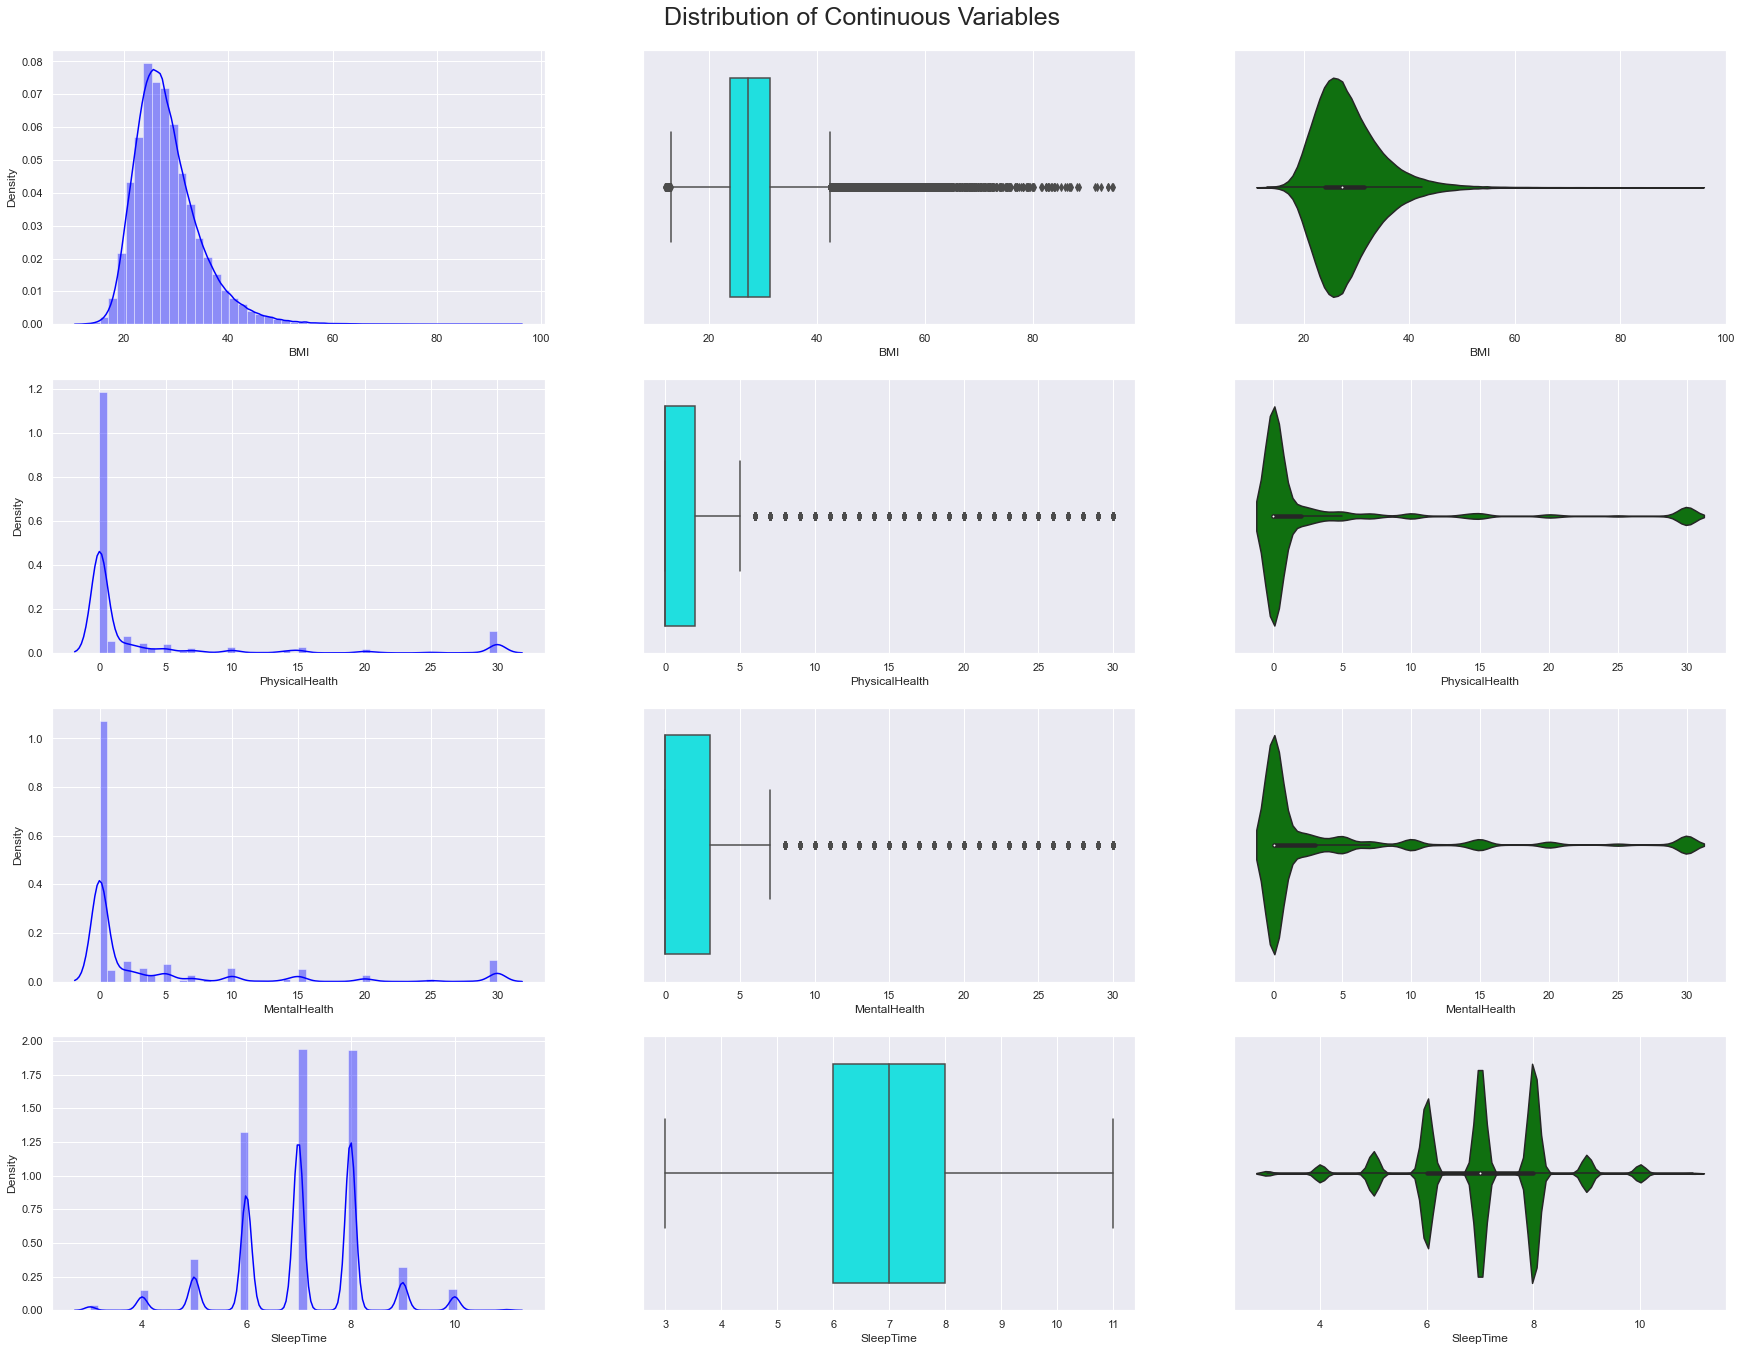

In [5]:
fig,ax = plt.subplots(len(numeric_features),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sb.distplot(heart_pki_df[i],ax=ax[index,0],color='blue')
    sb.boxplot(heart_pki_df[i],ax=ax[index,1],color='cyan')
    sb.violinplot(heart_pki_df[i],ax=ax[index,2],color='green')
    
#fig.tight_layout()
fig.subplots_adjust(top=1)
plt.suptitle("Distribution of Continuous Variables", y=1.03,fontsize=25)

- Only the distribution of BMI is similar Normal distribution
- Physical Health, Mental Health, and SleepTime is not

### 1.1.1 PKI - Continuous Variables - `BMI`

In [6]:
heart_pki_df['BMI'].describe()

count    315252.000000
mean         28.310411
std           6.333559
min          12.020000
25%          24.030000
50%          27.320000
75%          31.380000
max          94.850000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

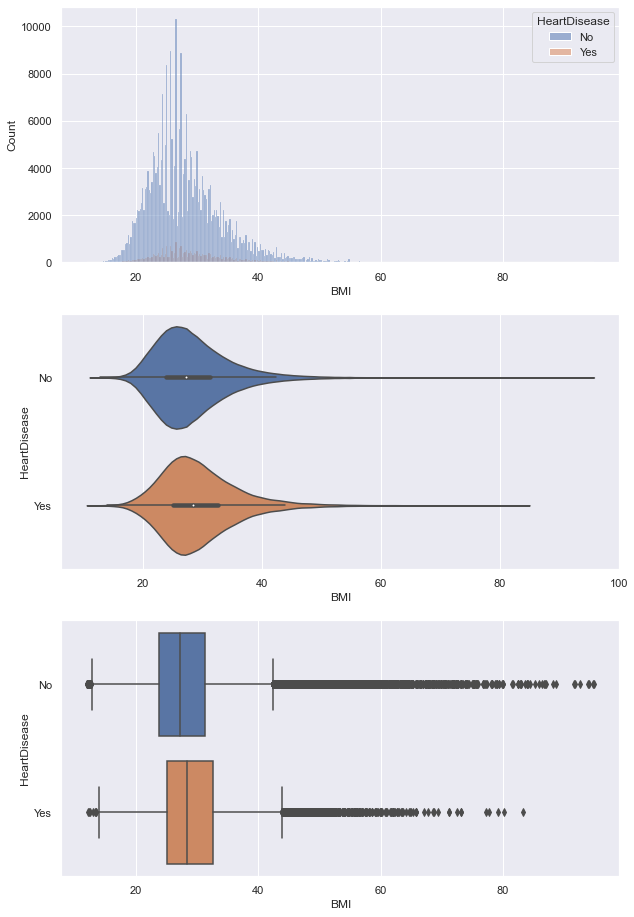

In [7]:
fig,ax = plt.subplots(3,1,figsize=(10,16))
sb.histplot(x='BMI', hue='HeartDisease', data=heart_pki_df, ax=ax[0])
sb.violinplot(x='BMI',y='HeartDisease', split=True, data=heart_pki_df, ax=ax[1])
sb.boxplot(x='BMI',y='HeartDisease', data=heart_pki_df, ax=ax[2])

- The distributions of BMI of people with Heart Disease & without Heart Disease are similar 

### 1.1.2 PKI - Continuous Variables - `Physical Health`
- how many days in a month did you feel poor physical health.

In [8]:
heart_pki_df['PhysicalHealth'].describe()

count    315252.000000
mean          3.293153
std           7.846490
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PhysicalHealth, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

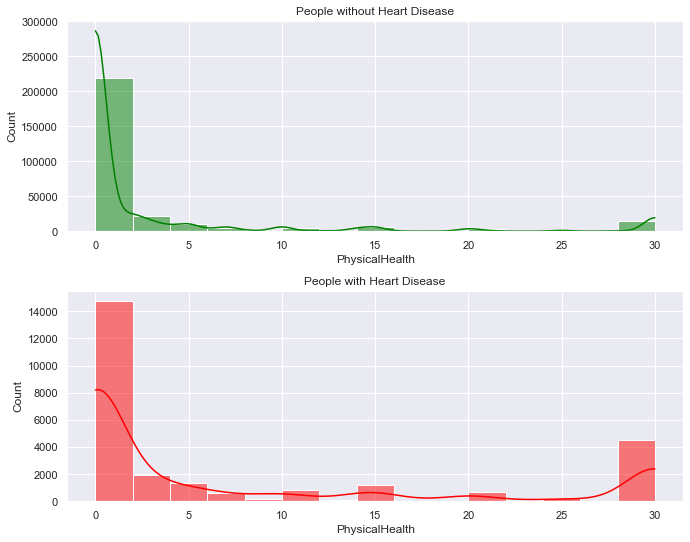

In [9]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="PhysicalHealth", ax=ax[0], kde=True, bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="PhysicalHealth", ax=ax[1], kde=True, bins=15, color="red").set_title('People with Heart Disease')

- The distributions of Physical Health of people with Heart Disease & without Heart Disease are almost similar
- A slight difference at the end of the distribution with more people with Heart Disease having a higher number of days with poor physical health.

### 1.1.3 PKI - Continuous Variables - `Mental Health`
- how many days in a month did you feel poor mental health.

In [10]:
heart_pki_df['MentalHealth'].describe()

count    315252.000000
mean          3.842377
std           7.880855
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

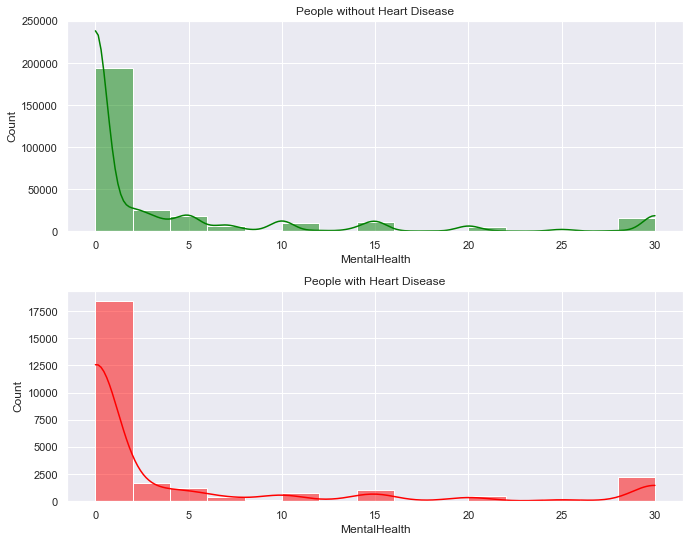

In [11]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="MentalHealth", ax=ax[0], kde=True, bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="MentalHealth", ax=ax[1], kde=True, bins=15, color="red").set_title('People with Heart Disease')

- The distributions of Mental Health of people with Heart Disease & without Heart Disease are similar 

### 1.1.4 PKI - Continuous Variables - `Sleep Time`
- On average, how many hours of sleep do you get in a 24-hour period?

In [12]:
heart_pki_df['SleepTime'].describe()

count    315252.000000
mean          7.058445
std           1.237237
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: SleepTime, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

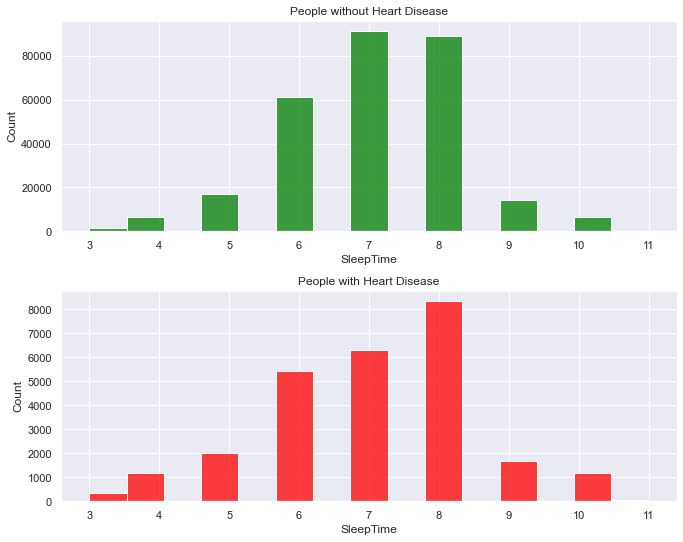

In [13]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="SleepTime", ax=ax[0], bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="SleepTime", ax=ax[1], bins=15, color="red").set_title('People with Heart Disease')

- The distributions of Sleep Time of people with Heart Disease & without Heart Disease are similar 

## 1.2 PKI - Categorical Variables
- Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

In [14]:
no_hd_df = heart_pki_df[heart_pki_df["HeartDisease"] == "No"]
hd_df = heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"]

In [35]:
# helper function to show percentage when plotting categorical variables with cardio
def plotCatVar(x, uniques_values):
    order = heart_pki_df[x].sort_values().unique()
    temp = heart_pki_df[heart_pki_df[x] != '0']
    ax = sb.countplot(x = temp[x], hue = temp['HeartDisease'], order= order,palette="coolwarm_r")

    total = len(temp[x])
    ind = 0
    for p in ax.patches:
        if ind<uniques_values == 0:
            total = ax.patches[ind].get_height() + ax.patches[ind+uniques_values].get_height()
        else:
            total = ax.patches[ind].get_height() + ax.patches[ind-uniques_values].get_height()
        percentage = f'{100 * ax.patches[ind].get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        ind = ind+1
    plt.tight_layout()
    plt.show()

### 1.2.1 PKI - Categorical Variables `AgeCategory`
- Fourteen-level age category

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

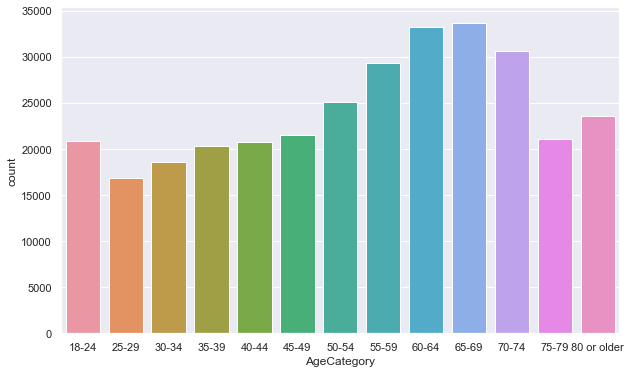

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sb.countplot(x='AgeCategory',data=heart_pki_df, order = sorted(list(set(heart_pki_df['AgeCategory']))))

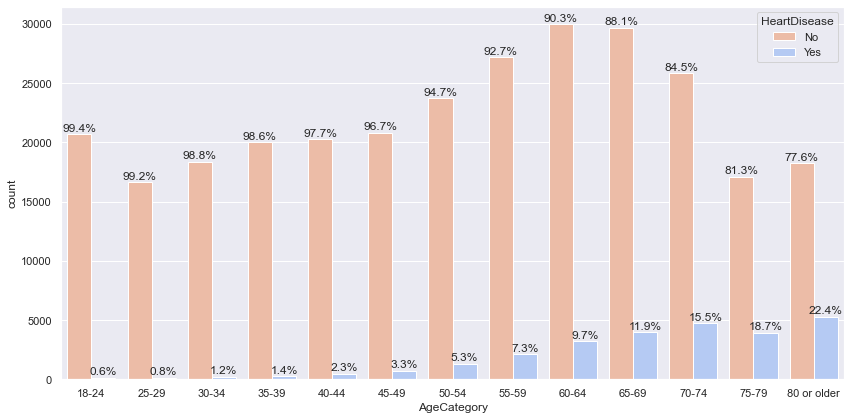

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('AgeCategory',13)

- People of higher age have a higher chance of having Heart Disease

### 1.2.2 PKI - Categorical Variables `Sex`
- Are you male or female?

<AxesSubplot:xlabel='Sex', ylabel='count'>

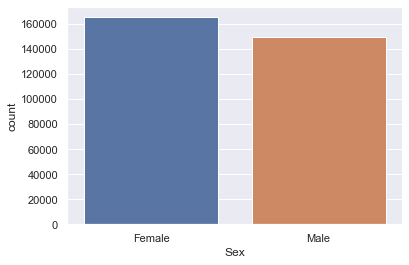

In [19]:
sb.countplot(x='Sex',data = heart_pki_df)

Text(0.5, 1.0, 'Females with Heart Disease')

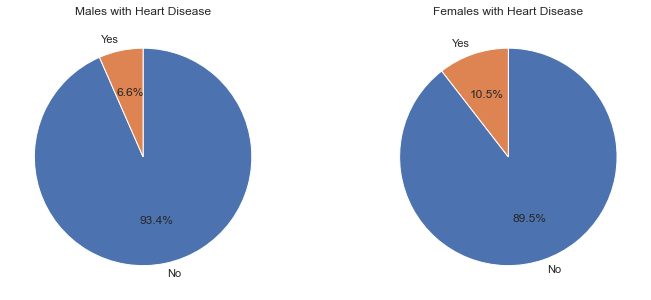

In [45]:
male_df = heart_pki_df[heart_pki_df["Sex"] == "Female"]
female_df = heart_pki_df[heart_pki_df["Sex"] == "Male"]

male_hd = male_df['HeartDisease'].value_counts()
female_hd = female_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,2,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(male_hd, labels = male_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Males with Heart Disease')


fig.add_subplot(axs[1])
plt.pie(female_hd, labels = male_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Females with Heart Disease')

- Females seem to have a slightly higher chance of 5% of getting a Heart Disease

### 1.2.3 PKI - Categorical Variables `Race`
- Imputed Race/Ethnicity value ... 

White / Hipsanic / Black / Other / Asian

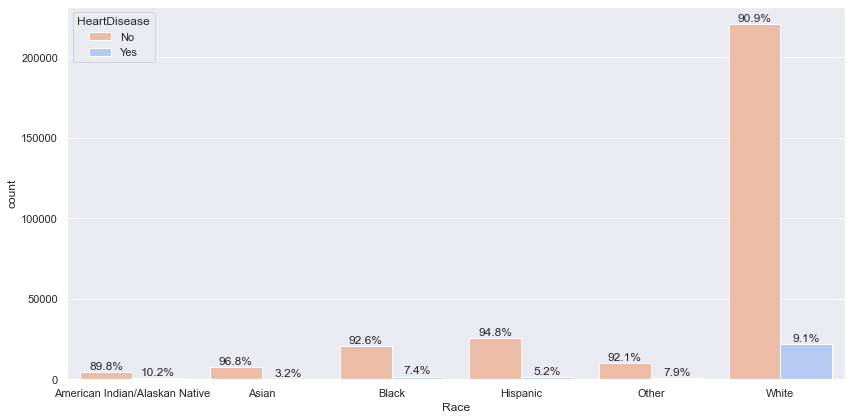

In [37]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('Race',6)

- Race does not seems to affect the chances of none getting a Heart Disease
- It is inconclusive if race affects the chances of getting Heart Disease as the dataset is unbalanced in this Race Category

### 1.2.4 PKI - Categorical Variables `GenHealth`
- Would you say that in general your health is... 

Excellent / Very Good / Good / Fair / Poor

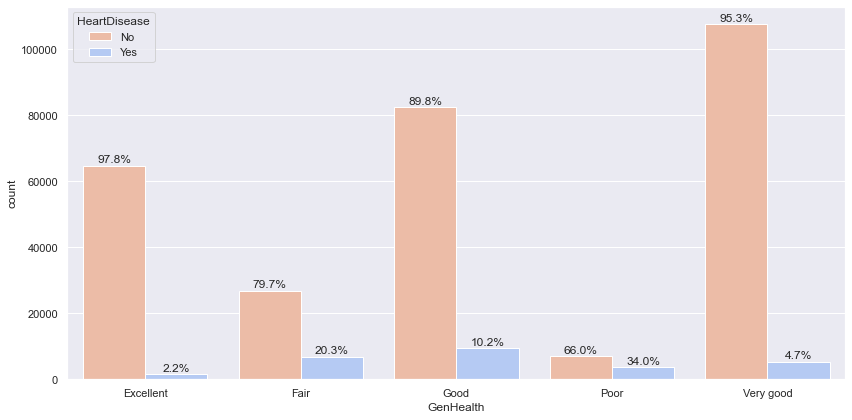

In [70]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('GenHealth',5)

- Those with poorer health conditon have a higher chance of having heart disease

### 1.2.5 PKI - Categorical Variables `DiffWalking`
- Do you have serious difficulty walking or climbing stairs?

Text(0.5, 1.0, 'Total number')

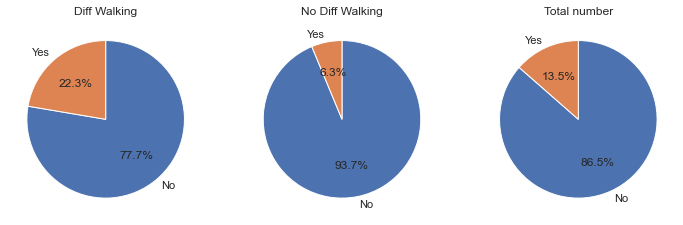

In [65]:
yes_df = heart_pki_df[heart_pki_df["DiffWalking"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["DiffWalking"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Diff Walking')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Diff Walking')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["DiffWalking"].value_counts(), labels =  heart_pki_df["DiffWalking"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those with diff walking have a higher chance of having heart disease
- However, this is inconclusive as the number of people that have difficulty walking are a small percentage of the total sample

### 1.2.6 PKI - Categorical Variables `Physical Activity`
- Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

Text(0.5, 1.0, 'Total number')

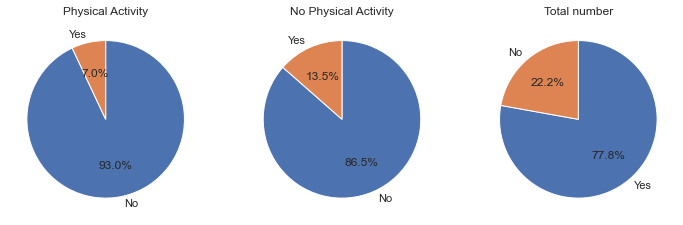

In [67]:
yes_df = heart_pki_df[heart_pki_df["PhysicalActivity"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["PhysicalActivity"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Physical Activity')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Physical Activity')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["PhysicalActivity"].value_counts(), labels =  heart_pki_df["PhysicalActivity"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those with no physical activity have a higher chance of having heart disease
- However, this is inconclusive as the number of people with no physical acitivity are a smaller percentage of the total sample

### 1.2.7 PKI - Categorical Variables `Smoking`
- Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 

Text(0.5, 1.0, 'Total number')

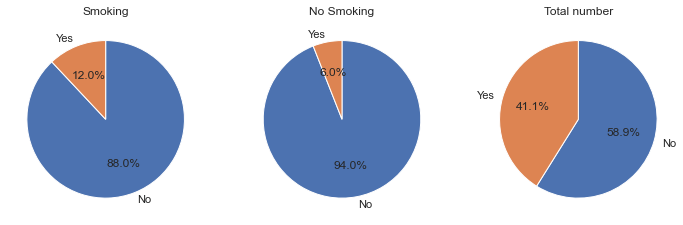

In [61]:
yes_df = heart_pki_df[heart_pki_df["Smoking"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["Smoking"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Smoking')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Smoking')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["Smoking"].value_counts(), labels =  heart_pki_df["Smoking"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those that smoke have a higher chance of having heart disease

### 1.2.8 PKI - Categorical Variables `AlcoholDrinking`
- Are you a heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Text(0.5, 1.0, 'Total number')

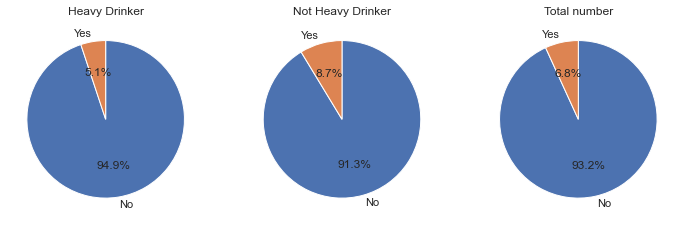

In [64]:
yes_df = heart_pki_df[heart_pki_df["AlcoholDrinking"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["AlcoholDrinking"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Heavy Drinker')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Not Heavy Drinker')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["AlcoholDrinking"].value_counts(), labels =  heart_pki_df["AlcoholDrinking"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those that are not heavy drinkers have a higher chance of having heart disease
- However, this is inconclusive as the number of heavy drinkers are a small percentage of the total sample

### 1.2.9 PKI - Categorical Variables `Stroke`
- Ever told you had a stroke? 

Text(0.5, 1.0, 'Total number')

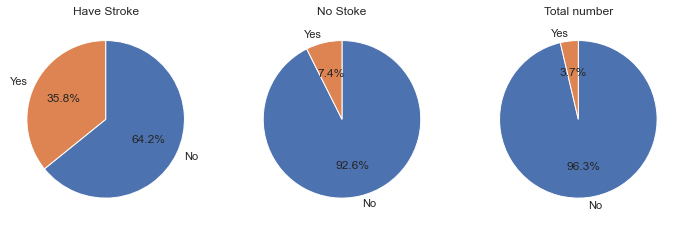

In [63]:
yes_df = heart_pki_df[heart_pki_df["Stroke"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["Stroke"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Had Stroke')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Stoke')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["Stroke"].value_counts(), labels =  heart_pki_df["Stroke"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those that had stroke have a higher chance of having heart disease
- However, this is inconclusive as the number of people that had stroke are a small percentage of the total sample

### 1.2.10 PKI - Categorical Variables `Diabetic`
- Ever told you had diabetes?

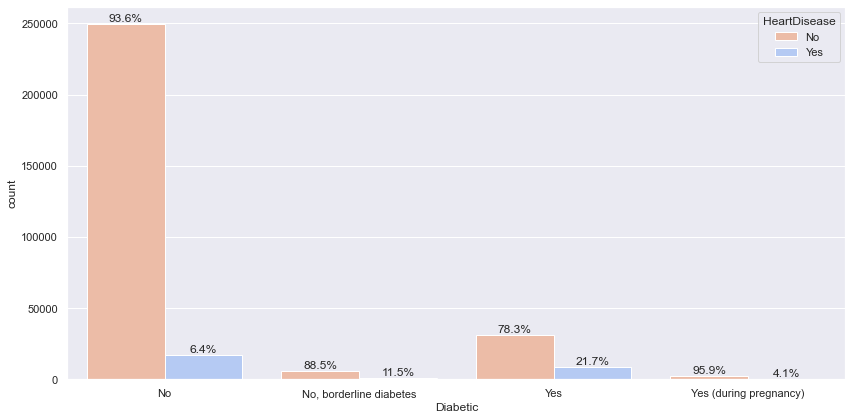

In [71]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('Diabetic',4)

- Being Diabetic does not seems to affect the chances of none getting a Heart Disease
- It is inconclusive if the type of diabetes affects the chances of getting Heart Disease as the dataset is unbalanced in this Diabetes Category

### 1.2.11 PKI - Categorical Variables `Asthma`
- Ever told you had Asthma?

Text(0.5, 1.0, 'Total number')

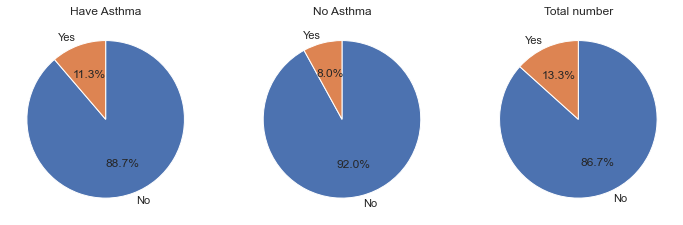

In [72]:
yes_df = heart_pki_df[heart_pki_df["Asthma"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["Asthma"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Have Asthma')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Asthma')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["Asthma"].value_counts(), labels =  heart_pki_df["Asthma"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- The chance of having a heart disease is not affected by one having asthma or not
- However, this is inconclusive as the number of people with asthma are a small percentage of the total sample

### 1.2.12 PKI - Categorical Variables `Kidney Disease`
- Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

Text(0.5, 1.0, 'Total number')

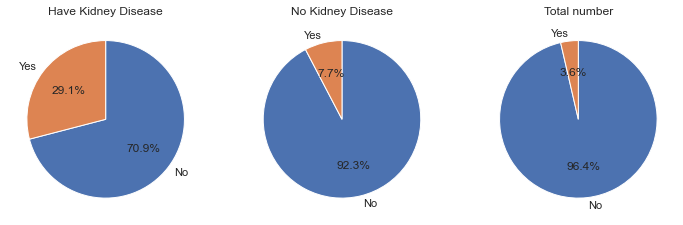

In [73]:
yes_df = heart_pki_df[heart_pki_df["KidneyDisease"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["KidneyDisease"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Had Kidney Disease')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Kidney Disease')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["KidneyDisease"].value_counts(), labels =  heart_pki_df["KidneyDisease"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those that had kidney disease have a higher chance of having heart disease
- However, this is inconclusive as the number of people with Kidney Disease are a small percentage of the total sample

### 1.2.13 PKI - Categorical Variables `Skin Cancer`
- Ever told you had Skin Cancer?

Text(0.5, 1.0, 'Total number')

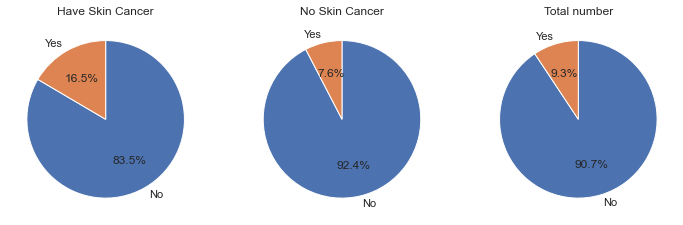

In [75]:
yes_df = heart_pki_df[heart_pki_df["SkinCancer"] == "Yes"]
no_df = heart_pki_df[heart_pki_df["SkinCancer"] == "No"]

yes_hd = yes_df['HeartDisease'].value_counts()
no_hd = no_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,3,figsize=(12,5))
fig.add_subplot(axs[0])
plt.pie(yes_hd, labels = yes_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Have Skin Cancer')


fig.add_subplot(axs[1])
plt.pie(no_hd, labels = no_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('No Skin Cancer')

fig.add_subplot(axs[2])
plt.pie(heart_pki_df["SkinCancer"].value_counts(), labels =  heart_pki_df["SkinCancer"].value_counts().index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Total number')

- Those that had kidney disease have a higher chance of having heart disease
- However, this is inconclusive as the number of people with Skin Cancer are a small percentage of the total sample